In [1]:
import sklearn
from sklearn.manifold import Isomap
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import numpy as np
import scipy.stats
import pylab as plt
from matplotlib import pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit
import random
import math

In [2]:
digits = datasets.load_digits()

First we reduce the dimensionality of the space from $N=64$ to $M<N$. Let's start with $M=2$.

In [3]:
n_components = 2
print('M = ', n_components)
embedding = Isomap(n_components=n_components)
X_transformed = embedding.fit_transform(digits.data)

M =  2


C:\Users\giuli\anaconda3\Lib\site-packages\sklearn\manifold\_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\giuli\anaconda3\Lib\site-packages\scipy\sparse\_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


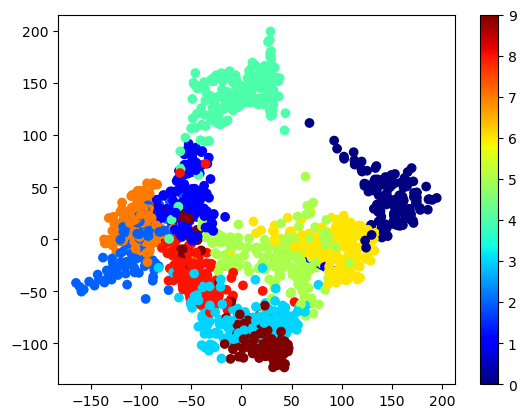

In [4]:
formatter = plt.FuncFormatter(lambda i, *args: digits.target_names[int(i)])
plt.scatter(X_transformed[:,0],X_transformed[:,1],c=digits.target,cmap=plt.colormaps['jet'])
plt.colorbar(ticks=digits.target_names, format=formatter)
plt.show()

Then, we split our data: we take $80\%$ of the images as tranining dataset and leave the other $20\%$ as a validation set

In [7]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(digits.data,digits.target,test_size=0.2,train_size=0.8)

Now we use a classification algorithm on the two sets and compute the accuracy in the two cases. Then we plot the confusion matrix to see which digits that are more challenging to identify.

In [10]:
print('Train set')
clf = LogisticRegression(solver='sag',max_iter=2000).fit(X_train, y_train)
y_pred = clf.predict(X_train)
print('Accuracy score: ',metrics.accuracy_score(y_train, y_pred))
print('Confusion matrix:\n',metrics.confusion_matrix(y_train, y_pred))
print('Test set')

y_pred = clf.predict(X_test)
print('Accuracy score: ',metrics.accuracy_score(y_test, y_pred))
print('Confusion matrix:\n',metrics.confusion_matrix(y_test, y_pred))

Train set
Accuracy score:  1.0
Confusion matrix:
 [[152   0   0   0   0   0   0   0   0   0]
 [  0 143   0   0   0   0   0   0   0   0]
 [  0   0 136   0   0   0   0   0   0   0]
 [  0   0   0 138   0   0   0   0   0   0]
 [  0   0   0   0 145   0   0   0   0   0]
 [  0   0   0   0   0 149   0   0   0   0]
 [  0   0   0   0   0   0 141   0   0   0]
 [  0   0   0   0   0   0   0 153   0   0]
 [  0   0   0   0   0   0   0   0 142   0]
 [  0   0   0   0   0   0   0   0   0 138]]
Test set
Accuracy score:  0.9638888888888889
Confusion matrix:
 [[26  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  1  0  0  0  0  1  0]
 [ 0  0 41  0  0  0  0  0  0  0]
 [ 0  0  0 44  0  1  0  0  0  0]
 [ 0  0  0  0 35  0  0  1  0  0]
 [ 0  0  0  0  0 33  0  0  0  0]
 [ 0  1  0  0  0  0 39  0  0  0]
 [ 0  0  0  0  0  0  0 25  1  0]
 [ 0  1  0  0  1  0  0  0 30  0]
 [ 0  0  0  0  0  1  0  0  4 37]]


With $M=2$ we have a low accuracy; there is confusion in the identification of some digits, for example there is confusion between 2 and 7 (as one would expect).
\
Let's increase $M$ to see how the accuracy changes

In [12]:
n_components = 4
embedding = Isomap(n_components=n_components)
X_transformed = embedding.fit_transform(digits.data)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_transformed,digits.target,test_size=0.2,train_size=0.8)
print('M = ', n_components)
print('Train set')
clf = LogisticRegression(solver='sag',max_iter=2000).fit(X_train, y_train)
y_pred = clf.predict(X_train)
print('Accuracy score: ',metrics.accuracy_score(y_train, y_pred))
print('Confusion matrix:\n',metrics.confusion_matrix(y_train, y_pred))
print('Test set')

y_pred = clf.predict(X_test)
print('Accuracy score: ',metrics.accuracy_score(y_test, y_pred))
print('Confusion matrix:\n',metrics.confusion_matrix(y_test, y_pred))

C:\Users\giuli\anaconda3\Lib\site-packages\sklearn\manifold\_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\giuli\anaconda3\Lib\site-packages\scipy\sparse\_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


M =  4
Train set
Accuracy score:  0.9088378566457899
Confusion matrix:
 [[147   0   0   0   0   0   0   0   0   0]
 [  0 122   9   0   0   0   5   0   0   0]
 [  0   2 130   0   0   0   0   1   4   0]
 [  0   0   0 117   0   1   0   1   5  17]
 [  0   0   0   0 150   1   0   0   0   1]
 [  0   1   0   0   0 140   1   0   0   2]
 [  0  12   0   0   0   1 135   0   0   0]
 [  0   0   0   0   0   0   0 137   0   4]
 [  0   5  10   3   0   0   0   1 128   2]
 [  0   0   0  17   1   3   0  21   0 100]]
Test set
Accuracy score:  0.9194444444444444
Confusion matrix:
 [[31  0  0  0  0  0  0  0  0  0]
 [ 0 43  1  0  0  0  1  0  1  0]
 [ 0  3 36  0  0  0  0  0  1  0]
 [ 0  0  0 39  0  0  0  0  0  3]
 [ 0  0  0  0 29  0  0  0  0  0]
 [ 0  0  0  0  1 36  0  0  0  1]
 [ 0  3  0  0  0  0 30  0  0  0]
 [ 0  0  0  0  0  0  0 37  0  1]
 [ 0  0  2  2  0  0  0  0 20  1]
 [ 0  0  1  3  0  0  0  3  1 30]]


Increasing $M$ the accuracy increases. With $M=4$ there is still confusion in discerning between the more similar digits, for example 3 and 9.